In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [233]:
df1 = pd.read_csv('/mnt/c/Users/xtanv/Study Mart/Dataset/linear_data.csv')
df1.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [234]:
x_linear = df1[['x']]
y_linear = df1[['y']]

In [235]:
df2 = pd.read_csv('/mnt/c/Users/xtanv/Study Mart/Dataset/nonlinear_data.csv')
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [236]:
x_nonlinear = df2[['x']]
y_nonlinear = df2[['y']]

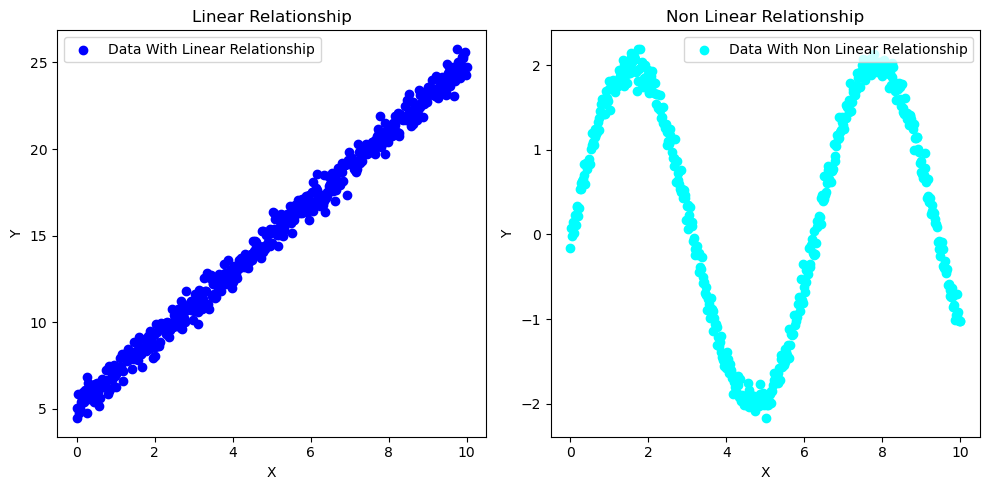

In [237]:
#linear
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_linear, y_linear,color='blue',label='Data With Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

#non linear
plt.subplot(1, 2, 2)
plt.scatter(x_nonlinear, y_nonlinear,color='cyan',label='Data With Non Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non Linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

In [238]:
df1.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [239]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [240]:
from sklearn.linear_model import LinearRegression

In [241]:
model = LinearRegression()

In [242]:
model.fit(x_linear, y_linear)

LinearRegression()

In [243]:
model.score(x_linear, y_linear)

0.9928923730526016

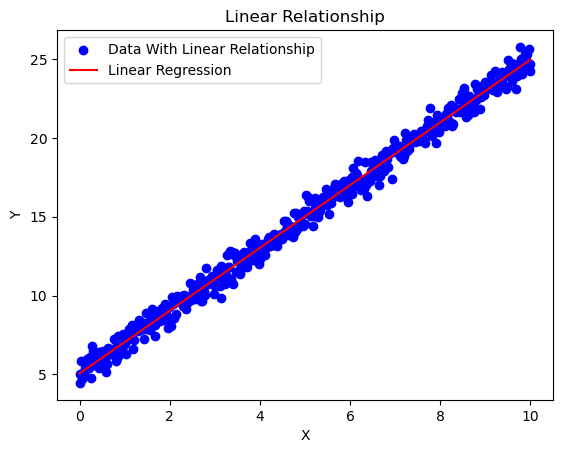

In [244]:
plt.scatter(x_linear, y_linear, color='blue',label='Data With Linear Relationship')
plt.plot(x_linear, model.predict(x_linear), color='red',label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

In [245]:
model2 = LinearRegression()

In [246]:
model2.fit(x_nonlinear, y_nonlinear)

LinearRegression()

In [247]:
model2.score(x_nonlinear, y_nonlinear)

0.004321199719043656

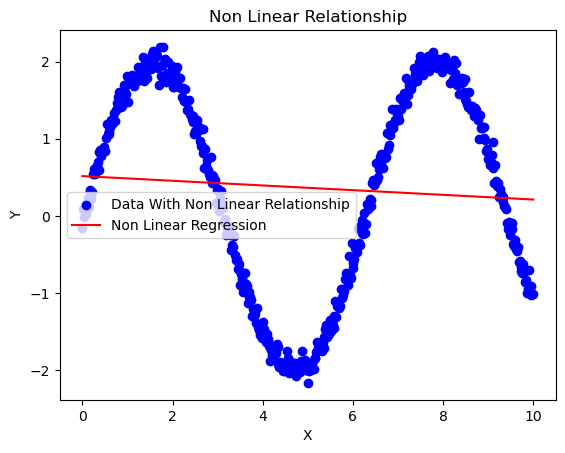

In [248]:
plt.scatter(x_nonlinear, y_nonlinear, color='blue',label='Data With Non Linear Relationship')
plt.plot(x_nonlinear, model2.predict(x_nonlinear), color='red',label='Non Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non Linear Relationship')
plt.legend()

In [249]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [250]:
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(x_nonlinear)

In [251]:
X_poly.shape

(500, 7)

In [252]:
model_poly = LinearRegression()

In [253]:
model_poly.fit(X_poly, y_nonlinear)

LinearRegression()

In [254]:
model_poly.score(X_poly, y_nonlinear)

0.993062484449735

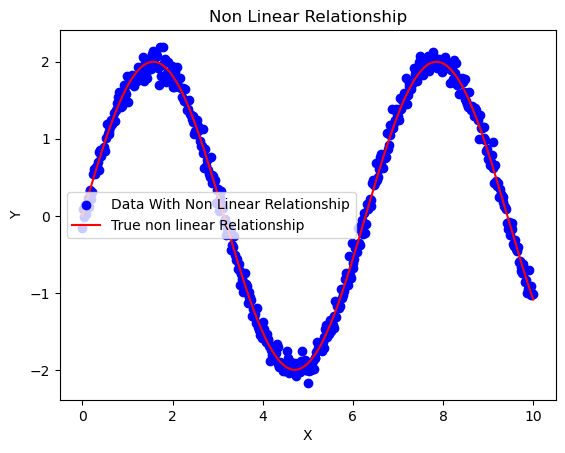

In [255]:
plt.scatter(x_nonlinear, y_nonlinear, color='blue',label='Data With Non Linear Relationship')
plt.plot(x_nonlinear, 2*np.sin(x_nonlinear), color='red',label='True non linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non Linear Relationship')
plt.legend()

In [256]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_poly, y_nonlinear, test_size=0.2, random_state=1)

In [257]:
model3 = LinearRegression()

In [258]:
model3.fit(xtrain, ytrain)

LinearRegression()

In [259]:
model3.score(xtest, ytest)

0.9901064341094342

In [260]:
model3.score(xtrain, ytrain)

0.9936164449301432

In [261]:
train_score = model3.score(xtrain, ytrain)
test_score = model3.score(xtest, ytest)

print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")

if train_score > test_score:
    print("The model is likely overfitting.")
elif train_score < test_score:
    print("The model is likely underfitting.")
else:
    print("The model has a good fit.")

Training Score: 0.9936164449301432
Test Score: 0.9901064341094342
The model is likely overfitting.
